In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Relevant Probabilistic Quantities

Prior: $
P(D) = 0.99
\quad
\text{(the probability of having the disease before testing)}
$

Sensitivity: $
P(+ \mid D) = 0.95
\quad
\text{(the probability of a positive test if the patient has the disease)}
$

Specificity: $
P(- \mid \lnot D) = 0.10
\quad
\text{(the probability of a negative test if the patient does not have the disease)}
$

Posterior: $
P(D \mid +)
\quad
\text{(the probability the patient has the disease given a positive test)}
$

### Posterior Probability Formula

By **Bayes’ Theorem**:

$$
P(D \mid +) 
= \frac{P(D)\,P(+ \mid D)}{P(D)\,P(+ \mid D) + P(\lnot D)\,P(+ \mid \lnot D)}
$$

Substituting the given values, 

$$
P(D \mid +) = \frac{0.01 \times 0.95}{0.01 \times 0.95 + 0.99 \times 0.10} \approx 0.08756
$$

The probability that the patient has Disease X given a positive test result is approximately **8.756%**.

## 2D graphs

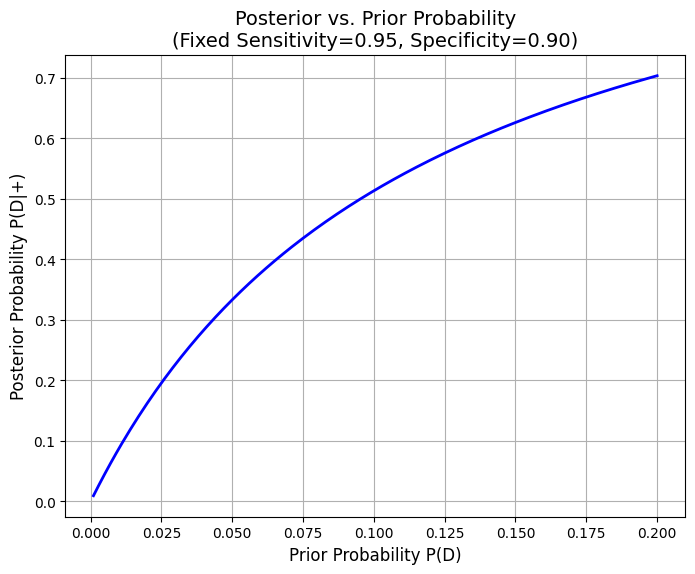

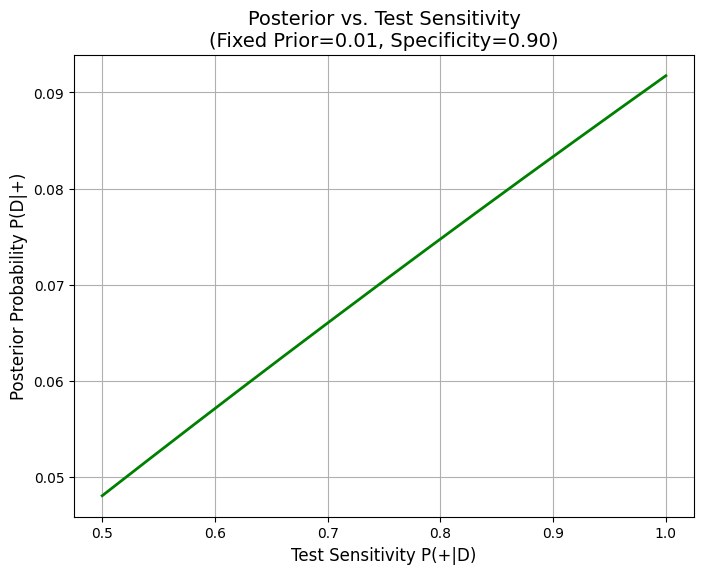

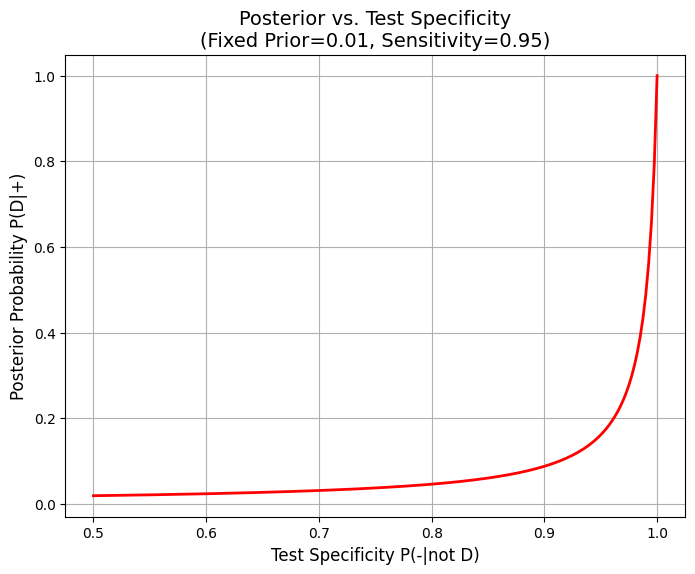

In [23]:
def bayes_posterior(prior: float, sensitivity: float, specificity: float) -> float:
    """
    Parameters:
        prior       : P(D) - Prior probability of disease.
        sensitivity : P(+|D) - Probability of a positive test given disease (true positive rate).
        specificity : P(-|not D) - Probability of a negative test given no disease.
                      The false positive rate is (1 - specificity).
    
    Returns:
        Posterior probability P(D|+).
    """

    return (prior * sensitivity)  / (prior * sensitivity + (1 - specificity) * (1 - prior))

# Plot 1: Varying Prior Probability
# Fixed sensitivity and specificity:
sensitivity_fixed = 0.95
specificity_fixed = 0.90
priors = np.linspace(0.001, 0.20, 200)
posteriors_prior = [bayes_posterior(p, sensitivity_fixed, specificity_fixed) for p in priors]

plt.figure(figsize=(8, 6))
plt.plot(priors, posteriors_prior, color='blue', linewidth=2)
plt.xlabel("Prior Probability P(D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Prior Probability\n(Fixed Sensitivity=0.95, Specificity=0.90)", fontsize=14)
plt.grid(True)
plt.show()

# Plot 2: Varying Sensitivity
# Fixed prior and specificity:
prior_fixed = 0.01
sensitivities = np.linspace(0.5, 1.0, 200)
posteriors_sens = [bayes_posterior(prior_fixed, s, specificity_fixed) for s in sensitivities]

plt.figure(figsize=(8, 6))
plt.plot(sensitivities, posteriors_sens, color='green', linewidth=2)
plt.xlabel("Test Sensitivity P(+|D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Test Sensitivity\n(Fixed Prior=0.01, Specificity=0.90)", fontsize=14)
plt.grid(True)
plt.show()

# Plot 3: Varying Specificity 
# Fixed prior and sensitivity:
specificities = np.linspace(0.5, 1.0, 200)
posteriors_spec = [bayes_posterior(prior_fixed, sensitivity_fixed, s) for s in specificities]

plt.figure(figsize=(8, 6))
plt.plot(specificities, posteriors_spec, color='red', linewidth=2)
plt.xlabel("Test Specificity P(-|not D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Test Specificity\n(Fixed Prior=0.01, Sensitivity=0.95)", fontsize=14)
plt.grid(True)
plt.show()

Variation in Prior Probability: 
When the disease prevalence increases, even modestly, the posterior probability rises nonlinearly. This means that in populations where the disease is more common, the same test result would be far more indicative of a true positive.

Variation in Sensitivity: 
With the prior fixed at a low level, improvements in sensitivity lead to an increase in the posterior probability. However, because the disease is rare, the gains from increasing sensitivity have a limited effect compared to changes in specificity.

Variation in Specificity: 
Improvements in specificity have a pronounced effect on the posterior probability. Since false positives dominate when the disease is rare, even a slight enhancement in specificity can significantly boost the reliability of a positive test result.


## 3d: Posterior vs. Prior & Sensitivity (fix specificity)

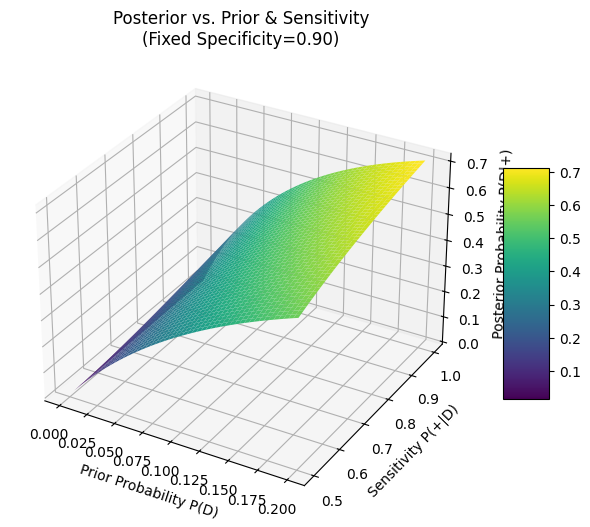

In [ ]:
# Fix specificity
specificity_fixed = 0.90

# Ranges for prior and sensitivity
prior_range = np.linspace(0.001, 0.20, 50)
sensitivity_range = np.linspace(0.5, 1.0, 50)

# Create meshgrid
PRIOR, SENS = np.meshgrid(prior_range, sensitivity_range)

# Compute posterior over the grid
POSTERIOR = np.zeros_like(PRIOR)
for i in range(PRIOR.shape[0]):
    for j in range(PRIOR.shape[1]):
        POSTERIOR[i, j] = bayes_posterior(PRIOR[i, j], SENS[i, j], specificity_fixed)

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(PRIOR, SENS, POSTERIOR, cmap='viridis', edgecolor='none')

ax.set_xlabel("Prior Probability P(D)")
ax.set_ylabel("Sensitivity P(+|D)")
ax.set_zlabel("Posterior Probability P(D|+)")
ax.set_title("Posterior vs. Prior & Sensitivity\n(Fixed Specificity=0.90)")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 3d: Posterior vs. Prior & Specificity (fix sensitivity)

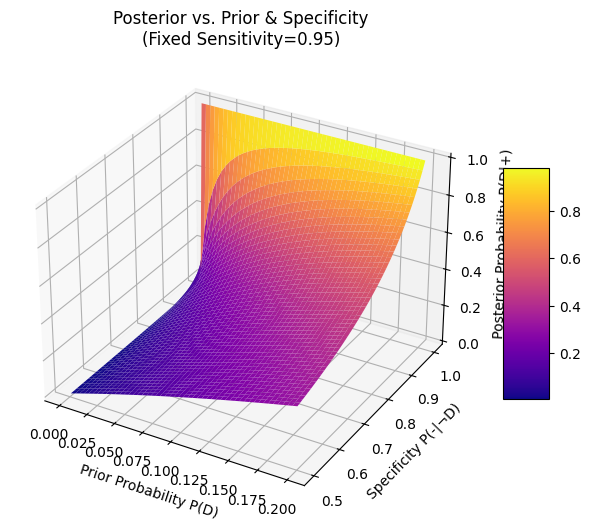

In [21]:
# Fix sensitivity
sensitivity_fixed = 0.95

# Ranges for prior and specificity
prior_range = np.linspace(0.001, 0.20, 50)
specificity_range = np.linspace(0.5, 1.0, 50)

# Create meshgrid
PRIOR, SPEC = np.meshgrid(prior_range, specificity_range)

# Compute posterior over the grid
POSTERIOR = np.zeros_like(PRIOR)
for i in range(PRIOR.shape[0]):
    for j in range(PRIOR.shape[1]):
        POSTERIOR[i, j] = bayes_posterior(PRIOR[i, j], sensitivity_fixed, SPEC[i, j])

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(PRIOR, SPEC, POSTERIOR, cmap='plasma', edgecolor='none')

ax.set_xlabel("Prior Probability P(D)")
ax.set_ylabel("Specificity P(-|¬D)")
ax.set_zlabel("Posterior Probability P(D|+)")
ax.set_title("Posterior vs. Prior & Specificity\n(Fixed Sensitivity=0.95)")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 3d: Posterior vs. Sensitivity & Specificity (fix prior)

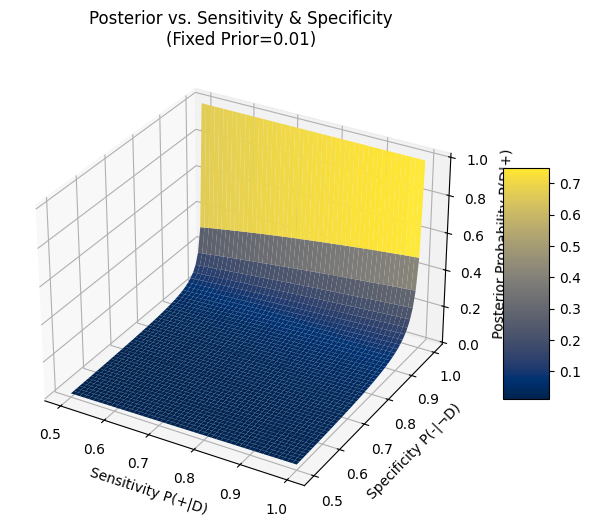

In [20]:
# Fix prior
prior_fixed = 0.01

# Ranges for sensitivity and specificity
sensitivity_range = np.linspace(0.5, 1.0, 50)
specificity_range = np.linspace(0.5, 1.0, 50)

# Create meshgrid
SENS, SPEC = np.meshgrid(sensitivity_range, specificity_range)

# Compute posterior over the grid
POSTERIOR = np.zeros_like(SENS)
for i in range(SENS.shape[0]):
    for j in range(SENS.shape[1]):
        POSTERIOR[i, j] = bayes_posterior(prior_fixed, SENS[i, j], SPEC[i, j])

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(SENS, SPEC, POSTERIOR, cmap='cividis', edgecolor='none')

ax.set_xlabel("Sensitivity P(+|D)")
ax.set_ylabel("Specificity P(-|¬D)")
ax.set_zlabel("Posterior Probability P(D|+)")
ax.set_title(f"Posterior vs. Sensitivity & Specificity\n(Fixed Prior={prior_fixed})")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()